In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats
from scipy.stats import ttest_ind

In [123]:
equip = pd.read_csv('../data/merged_equipment.csv')
police = pd.read_csv('../data/police_eda.csv')

In [124]:
police.head()

,Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing),Date (Year)
0,25746,01/01/2000,Willits,CA,95490.0,MENDOCINO,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
1,25747,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
2,25748,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
3,25749,01/01/2000,Carlsbad,NM,88220.0,EDDY,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
4,2,01/02/2000,Ellenwood,GA,30294.0,DE KALB,33.645164,-84.229413,DeKalb County Sheriff's Office,Gunshot,"Intentional Use of Force, Deadly",2000.0


In [125]:
police_2006 = police[police['Date (Year)'] > 2005]
police_2006.head()

,Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing),Date (Year)
5854,4800,01/01/2006,Berlin,PA,15530.0,SOMERSET,39.922100,-78.958158,Pennsylvania State Police,Gunshot,"Intentional Use of Force, Deadly",2006.0
5855,4801,01/01/2006,Austin,TX,78745.0,TRAVIS,30.186221,-97.803055,Austin Police Department,Gunshot,"Intentional Use of Force, Deadly",2006.0
5856,20016,01/01/2006,Harrisburg,PA,17104.0,DAUPHIN,40.251785,-76.860569,Harrisburg Police Bureau,Gunshot,"Intentional Use of Force, Deadly",2006.0
5857,4799,01/01/2006,South Gate,CA,90280.0,LOS ANGELES,33.960548,-118.209740,South Gate Police Department,Gunshot,"Intentional Use of Force, Deadly",2006.0
5858,4802,01/02/2006,Las Vegas,NV,89104.0,CLARK,36.158483,-115.109495,Las Vegas Metropolitan Police Department,Gunshot,"Intentional Use of Force, Deadly",2006.0


In [126]:
#columns_to_drop = ['Date of injury resulting in death (month/day/year)', 'Latitude', 'Longitude']
police_for_merge = police_2006.drop(columns = ['Date of injury resulting in death (month/day/year)', 'Latitude', 'Longitude', 'Zip Code', 'City', 'Agency responsible for death', 'Cause of death', 'Intentional Use of Force (Developing)', 'Date (Year)'])

In [127]:
police_for_merge = pd.DataFrame(police_for_merge)

In [128]:
police_for_merge.head()

,Unique ID,State,County
5854,4800,PA,SOMERSET
5855,4801,TX,TRAVIS
5856,20016,PA,DAUPHIN
5857,4799,CA,LOS ANGELES
5858,4802,NV,CLARK


In [129]:
police_for_merge = police_for_merge.groupby(['County', 'State']).size()
#fatal_counties.head()
police_for_merge = police_for_merge.reset_index()
police_for_merge

,County,State,0
0,ACADIA,LA,5
1,ADA,ID,24
2,ADAIR,OK,3
3,ADAMS,CO,62
4,ADAMS,ID,2
...,...,...,...
2217,YORK,SC,13
2218,YORK,VA,3
2219,YOUNG,TX,1
2220,YUBA,CA,11


In [130]:
police_for_merge = police_for_merge.rename(columns = {0: 'Fatalities'})
police_for_merge.head(10)

,County,State,Fatalities
0,ACADIA,LA,5
1,ADA,ID,24
2,ADAIR,OK,3
3,ADAMS,CO,62
4,ADAMS,ID,2
5,ADAMS,IL,5
6,ADAMS,MS,4
7,ADAMS,NE,2
8,ADAMS,PA,3
9,ADAMS,WA,3


In [131]:
equip.head()

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
0,AK,ANCHORAGE,1063,636550.09,130.0,521602.23
1,AK,BETHEL,2,0.00,0.0,0.00
2,AK,FAIRBANKS NORTH STAR,18,26624.67,15.0,7485.00
3,AK,JUNEAU,14,5542.00,14.0,5542.00
4,AK,KETCHIKAN GATEWAY,4,1996.00,4.0,1996.00


In [132]:
#Create a merged DataFrame that accounts for both total amounts of equipment and militarized equipment
analysis = pd.merge(police_for_merge, equip, on=['State', 'County'], how='outer')
analysis.fillna(0, inplace=True)

In [133]:
analysis.sample(10)

,County,State,Fatalities,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
421,COLLETON,SC,5.0,34.0,109434.86,10.0,6655.86
1116,LANCASTER,PA,21.0,467.0,11863.05,13.0,3455.00
276,CAROLINE,VA,1.0,1.0,460000.00,1.0,460000.00
138,BERKELEY,WV,9.0,28.0,374028.00,22.0,319018.00
2281,EARLY,GA,0.0,2.0,4700.00,2.0,4700.00
833,HAMPSHIRE,MA,1.0,57.0,197370.88,19.0,140465.00
970,IZARD,AR,1.0,9.0,1080.00,9.0,1080.00
2585,CLAY,NC,0.0,1248.0,94347.12,1.0,47455.00
555,DEWEY,OK,1.0,2.0,50000.00,2.0,50000.00
1544,OTSEGO,NY,1.0,631.0,233311.58,8.0,137829.00


In [134]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                2925 non-null   object 
 1   State                 2925 non-null   object 
 2   Fatalities            2925 non-null   float64
 3   Total Equip Quantity  2925 non-null   float64
 4   Total Cost            2925 non-null   float64
 5   Mil Equip Quantity    2925 non-null   float64
 6   Total Mil Cost        2925 non-null   float64
dtypes: float64(5), object(2)
memory usage: 160.1+ KB


In [135]:
analysis = analysis[(analysis['State'] != 'PR') & (analysis['State'] != 'VI') & (analysis['State'] != 'GU')]

In [136]:
analysis_df = analysis[analysis['Fatalities']>0]

In [137]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 2221
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                2222 non-null   object 
 1   State                 2222 non-null   object 
 2   Fatalities            2222 non-null   float64
 3   Total Equip Quantity  2222 non-null   float64
 4   Total Cost            2222 non-null   float64
 5   Mil Equip Quantity    2222 non-null   float64
 6   Total Mil Cost        2222 non-null   float64
dtypes: float64(5), object(2)
memory usage: 138.9+ KB


<Axes: >

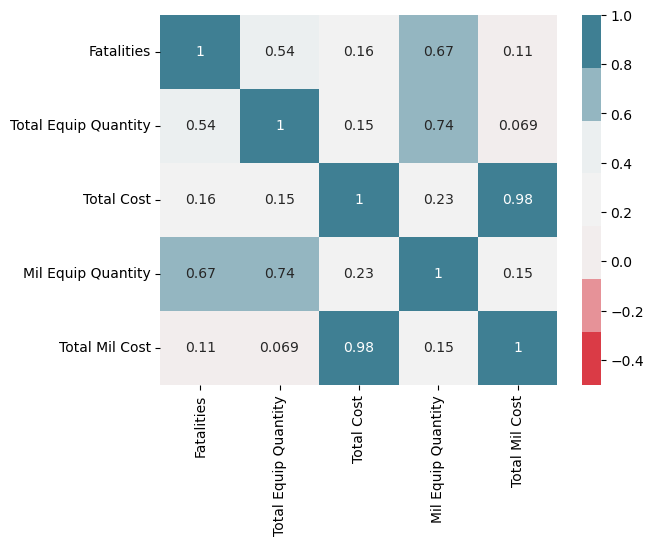

In [138]:
sns.heatmap(analysis_df.corr(numeric_only=True), annot=True,
            cmap=sns.diverging_palette(10, 220, sep=80, n=7),
            vmin = -0.5,
            vmax = 1)

/Users/catherinefuller/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


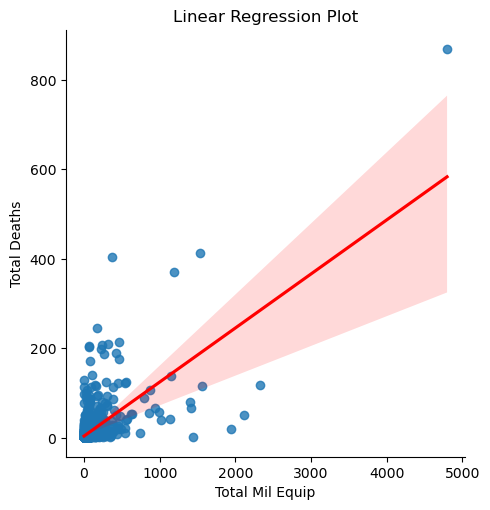

In [139]:
#Mil Equipment Vs Fatalities
sns.lmplot(x='Mil Equip Quantity', y='Fatalities', data=analysis_df, line_kws={"color":"red"})
plt.title('Linear Regression Plot')
plt.xlabel('Total Mil Equip')
plt.ylabel('Total Deaths')
plt.show()

/Users/catherinefuller/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


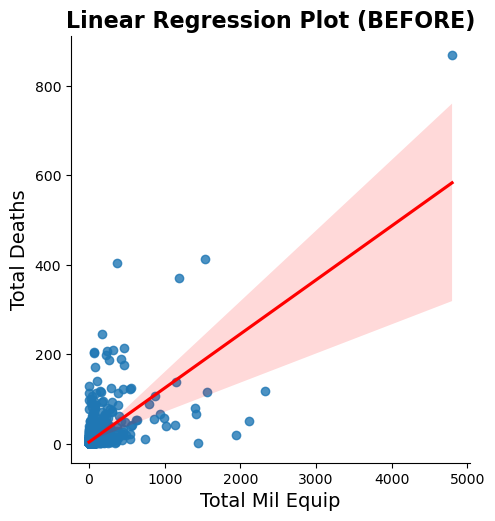

In [159]:
#Total Equipment Vs Fatalities
sns.lmplot(x='Mil Equip Quantity', y='Fatalities', data=analysis_df, line_kws={"color":"red"})
plt.title('Linear Regression Plot (BEFORE)', fontsize=16, fontweight='bold')
plt.xlabel('Total Mil Equip', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.show()

In [224]:
lin_reg_1 = analysis_df[(analysis_df['Mil Equip Quantity'] > 0) & (analysis_df['Mil Equip Quantity'] < 600) & (analysis_df['Fatalities'] > 0) & (analysis_df['Fatalities'] < 200)]
lin_reg_1

,County,State,Fatalities,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
0,ACADIA,LA,5.0,23.0,738563.00,23.0,738563.00
1,ADA,ID,24.0,34.0,620008.00,34.0,620008.00
2,ADAIR,OK,3.0,4.0,498.00,4.0,498.00
3,ADAMS,CO,62.0,673.0,106474.29,45.0,82103.00
5,ADAMS,IL,5.0,48.0,183163.30,17.0,181402.00
...,...,...,...,...,...,...,...
2217,YORK,SC,13.0,34.0,165745.00,34.0,165745.00
2218,YORK,VA,3.0,5.0,540.00,5.0,540.00
2219,YOUNG,TX,1.0,296.0,247599.60,30.0,221663.22
2220,YUBA,CA,11.0,72.0,74085.40,11.0,52059.00


/Users/catherinefuller/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


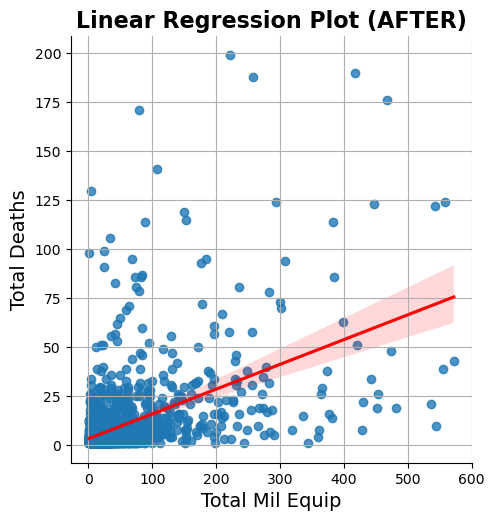

In [225]:
#Lin Reg with Scoped Mil Equipment


#Mil Equipment Vs Fatalities
sns.lmplot(x='Mil Equip Quantity', y='Fatalities', data=lin_reg_1, line_kws={"color":"red"})
plt.title('Linear Regression Plot (AFTER)', fontsize=16, fontweight='bold')
plt.xlabel('Total Mil Equip', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.grid(True)
plt.show()

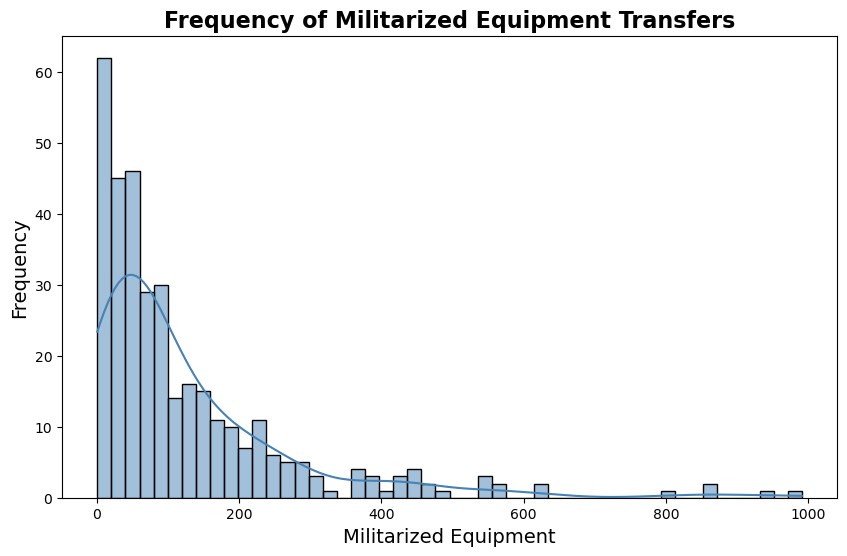

In [156]:
plt.figure(figsize=(10, 6))
sns.histplot(data=lin_reg_1, x='Mil Equip Quantity', bins=50, color='steelblue', kde=True)
plt.title('Frequency of Militarized Equipment Transfers', fontsize=16, fontweight='bold')
plt.xlabel('Militarized Equipment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [168]:
counties_with_mil = analysis_df[analysis_df['Mil Equip Quantity']>0]
counties_with_mil

,County,State,Fatalities,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
0,ACADIA,LA,5.0,23.0,738563.00,23.0,738563.00
1,ADA,ID,24.0,34.0,620008.00,34.0,620008.00
2,ADAIR,OK,3.0,4.0,498.00,4.0,498.00
3,ADAMS,CO,62.0,673.0,106474.29,45.0,82103.00
5,ADAMS,IL,5.0,48.0,183163.30,17.0,181402.00
...,...,...,...,...,...,...,...
2217,YORK,SC,13.0,34.0,165745.00,34.0,165745.00
2218,YORK,VA,3.0,5.0,540.00,5.0,540.00
2219,YOUNG,TX,1.0,296.0,247599.60,30.0,221663.22
2220,YUBA,CA,11.0,72.0,74085.40,11.0,52059.00


In [169]:
counties_with_no_mil = analysis_df[analysis_df['Mil Equip Quantity']==0]
counties_with_no_mil

,County,State,Fatalities,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
4,ADAMS,ID,2.0,0.0,0.00,0.0,0.0
28,ALLEGHANY,NC,2.0,0.0,0.00,0.0,0.0
33,ALLEN,LA,2.0,0.0,0.00,0.0,0.0
38,AMITE,MS,1.0,0.0,0.00,0.0,0.0
44,ANDREW,MO,1.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...
2177,WINKLER,TX,1.0,0.0,0.00,0.0,0.0
2178,WINN,LA,1.0,0.0,0.00,0.0,0.0
2187,WOLFE,KY,1.0,0.0,0.00,0.0,0.0
2202,WYOMING,PA,1.0,127.0,23732.26,0.0,0.0


In [173]:
#T Testing

print("Null Hyp: Counties with militarized equipment have similar fatality rates as counties with militarized equipment")
print("Alt Hyp: Counties with militarized equipment have HIGHER fatality rates as counties with militarized equipment")

from scipy.stats import ttest_ind
county_mil_data = analysis_df[analysis_df['Mil Equip Quantity']>0]['Fatalities']
county_no_mil = analysis_df[analysis_df['Mil Equip Quantity']==0]['Fatalities']
t_statistic, p_value = ttest_ind(county_mil_data, county_no_mil)
print(t_statistic, p_value)
print("Based on the p_value of " + str(p_value) +", we reject the null hypothesis.")

Null Hyp: Counties with militarized equipment have similar fatality rates as counties with militarized equipment
Alt Hyp: Counties with militarized equipment have HIGHER fatality rates as counties with militarized equipment
4.707764766440929 2.6589072089593097e-06
Based on the p_value of 2.6589072089593097e-06, we reject the null hypothesis.


In [174]:
analysis_df

,County,State,Fatalities,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
0,ACADIA,LA,5.0,23.0,738563.00,23.0,738563.00
1,ADA,ID,24.0,34.0,620008.00,34.0,620008.00
2,ADAIR,OK,3.0,4.0,498.00,4.0,498.00
3,ADAMS,CO,62.0,673.0,106474.29,45.0,82103.00
4,ADAMS,ID,2.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...
2217,YORK,SC,13.0,34.0,165745.00,34.0,165745.00
2218,YORK,VA,3.0,5.0,540.00,5.0,540.00
2219,YOUNG,TX,1.0,296.0,247599.60,30.0,221663.22
2220,YUBA,CA,11.0,72.0,74085.40,11.0,52059.00


In [177]:
import scipy.stats as stats
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [201]:
# Step 1: Prepare Data
X = analysis_df[['Mil Equip Quantity']]
y = analysis_df['Fatalities']

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

# Step 3: Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R^2 Score:', r2)
print('Mean Squared Error:', mse)



R^2 Score: 0.6603507445935513
Mean Squared Error: 916.1936090245896


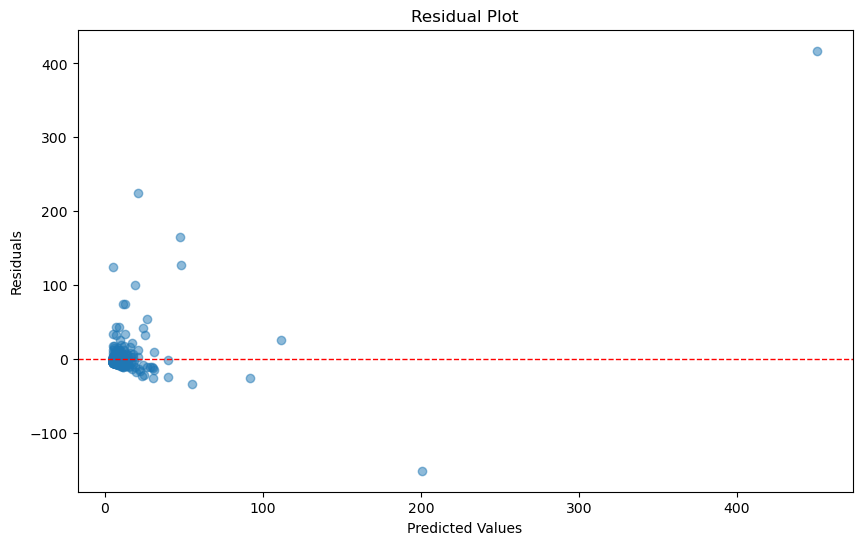

In [194]:
# Step 5: Residual Analysis
residuals = y_test - y_pred
# Plot the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [186]:
analysis_df.describe()

,Fatalities,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
count,2222.000000,2222.000000,2.222000e+03,2222.000000,2.222000e+03
mean,9.804680,1174.065707,6.110600e+05,49.406841,3.534386e+05
std,31.007306,9031.255849,4.694536e+06,172.053728,4.284476e+06
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,4.000000,1.551000e+03,2.000000,9.980000e+02
50%,3.000000,29.000000,4.975000e+04,13.000000,2.878200e+04
75%,7.000000,182.750000,4.237483e+05,38.000000,2.059292e+05
max,868.000000,254046.000000,2.103695e+08,4799.000000,1.996676e+08


In [200]:
# Step 6: Predict Fatalities
# Assuming amount of mil equip is known
mil_equip_amount = 10  # Example 
#total_equip_amount =        # Example loan years
# Predict fatalities
predicted_fatalities = model.predict([[mil_equip_amount]])
print('Predicted Fatalities:', predicted_fatalities[0])

Predicted Fatalities: 6.001314145831333


/Users/catherinefuller/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [233]:
#Lin REg 1
# Step 1: Prepare Data
X = lin_reg_1[['Mil Equip Quantity']]
y = lin_reg_1['Fatalities']

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

# Step 3: Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R^2 Score:', r2)
print('Mean Squared Error:', mse)

R^2 Score: 0.3167505522334009
Mean Squared Error: 156.5855526173614


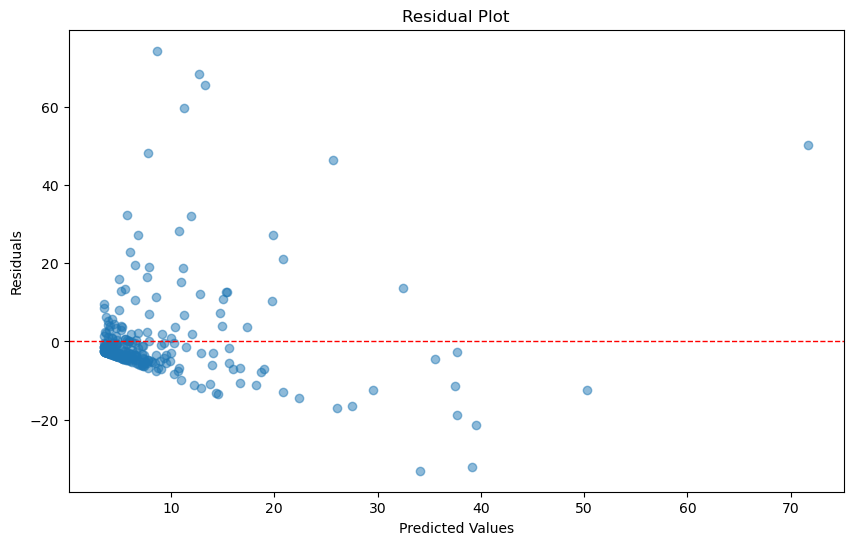

In [227]:
# Step 5: Residual Analysis
residuals = y_test - y_pred
# Plot the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [232]:
# Step 6: Predict Fatalities
# Assuming amount of mil equip is known
mil_equip_amount = 30  # Example 
#total_equip_amount =        # Example loan years
# Predict interest rate
predicted_fatalities = model.predict([[mil_equip_amount]])
print('Predicted Fatalities:', predicted_fatalities[0])

Predicted Fatalities: 7.142976694435985


/Users/catherinefuller/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
